In [1]:
import csv
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import random
import seaborn as sb
import tensorflow as tf
from tensorflow.python.framework import ops

In [2]:
train = pd.read_csv(r'C:\Users\44788\Desktop\coding\pynbs\Kaggle\train.csv')
test = pd.read_csv(r'C:\Users\44788\Desktop\coding\pynbs\Kaggle\test.csv')

In [3]:
def model_data(input_df, col_start): 
    Xlist = []
    pixel_names = list(input_df.columns[col_start:])
    for pixel in pixel_names:
        Xlist.append(list(input_df[pixel]))
    Xarray = np.array(Xlist)
    image_list = []
    for image in Xarray.T:
        image_list.append(np.reshape(image, (28,28)))
    image_list = np.array(image_list)
    return image_list
Xtrain = model_data(train, 1)

In [4]:
Xtest = model_data(test, 0)

In [5]:
Ytrain = np.expand_dims(np.array(train['label']), 1)

(<matplotlib.axes._subplots.AxesSubplot at 0x21aa22a8c50>, (42000, 28, 28))

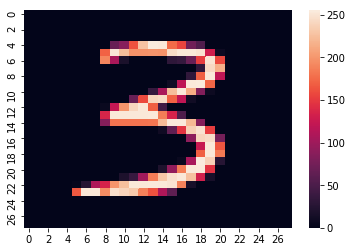

In [6]:
sb.heatmap(Xtest[9]), Xtrain.shape

In [7]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    """
    n_H0 -- scalar, height of an input image
    n_W0 -- scalar, width of an input image
    n_C0 -- scalar, number of channels of the input
    n_y -- scalar, number of classes
    """
    X = tf.placeholder(tf.float32, shape=(None, n_H0, n_W0, n_C0), name='X') # none refers to the batch size so it can be specic
    Y = tf.placeholder(tf.float32, shape=(None, n_y), name='Y')   
    return X, Y

In [8]:
def initialize_parameters():
    W1 = tf.get_variable('W1', shape=(4,4,1,8), initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W2 = tf.get_variable('W2', shape=(2,2,8,16), initializer=tf.contrib.layers.xavier_initializer(seed=0))
    parameters = {"W1": W1,
                  "W2": W2}
    return parameters

In [9]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']
    Z1 = tf.nn.conv2d(X,W1, strides = [1,1,1,1], padding = 'SAME') 
    A1 = tf.nn.relu(Z1)
    P1 = tf.nn.max_pool(A1, ksize = [1,8,8,1], strides = [1,8,8,1], padding = 'SAME')
    Z2 = tf.nn.conv2d(P1,W2, strides = [1,1,1,1], padding = 'SAME')
    A2 = tf.nn.relu(Z2)
    P2 = tf.nn.max_pool(A2, ksize = [1,4,4,1], strides = [1,4,4,1], padding = 'SAME')
    F = tf.contrib.layers.flatten(P2)
    Z3 = tf.contrib.layers.fully_connected(F, 6, activation_fn=None)
    return Z3

In [10]:
def compute_cost(Z3, Y):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y))
    return cost

In [19]:
def random_mini_batches(X_train, Y_train, minibatch_size):
    Xbatches = np.array_split(X_train,660,axis=0)
    Ybatches = np.array_split(Y_train,660,axis=0)
    batchlist = [(np.expand_dims(Xbatch, 3), Ybatch) for Xbatch, Ybatch in zip(Xbatches, Ybatches)]
    return batchlist

In [24]:
def model(X_train, Y_train, X_test, learning_rate = 0.009,num_epochs = 100, minibatch_size = 64, print_cost = True):
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    (m, n_H0, n_W0) = X_train.shape 
    n_C0 = 1
    n_y = Y_train.shape[1]                            
    costs = []                                        # To keep track of the cost
    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(num_epochs):

            minibatch_cost = 0.
            num_minibatches = 660 # number of minibatches of size minibatch_size in the train set
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size)
            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                _ , temp_cost = sess.run([optimizer, cost], {X: minibatch_X, Y: minibatch_Y})
                minibatch_cost += temp_cost / num_minibatches
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
        
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    predict_op = tf.argmax(Z3, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(accuracy)
    return parameters, accuracy

Cost after epoch 0: 113143758.473786
Cost after epoch 5: 5150618989.381828
Cost after epoch 10: 9057891921.454546
Cost after epoch 15: 6341443700.363641
Cost after epoch 20: 340509740.448485
Cost after epoch 25: 377528477.333333
Cost after epoch 30: 448256930.739394
Cost after epoch 35: 477759916.121213
Cost after epoch 40: 605868775.830303
Cost after epoch 45: 667410599.975757
Cost after epoch 50: 679086282.484848
Cost after epoch 55: 764041456.606061
Cost after epoch 60: 702063067.781819
Cost after epoch 65: 793742285.721212
Cost after epoch 70: 959194593.551515
Cost after epoch 75: 927484102.496970
Cost after epoch 80: 938180848.315152
Cost after epoch 85: 1041125175.393939
Cost after epoch 90: 1352367098.133334
Cost after epoch 95: 1257863747.878789


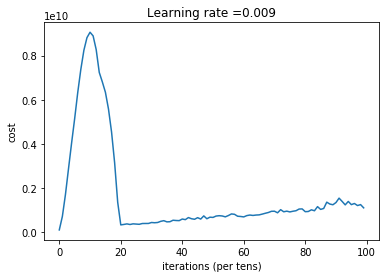

Tensor("Mean_1:0", shape=(), dtype=float32)


In [25]:
parameters, accuracy = model(Xtrain, Ytrain, Xtest)